In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
data= pd.read_csv('Churn_Modelling.csv')

In [ ]:
x= data.iloc[:,3:-1].values
y= data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x[:,2]= le.fit_transform(x[:,2])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer([('nation',OneHotEncoder(),[1])],remainder='passthrough')
x= np.array(ct.fit_transform(x))

In [ ]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)


In [ ]:
from tensorflow.keras.models import Sequential

ann=Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

ann.add(Input(shape=(12,)))
ann.add(Dense(units=24,activation='relu'))
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 24)                312       
                                                                 
 dense_16 (Dense)            (None, 6)                 150       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=ann.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
500/500 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.8659 - val_loss: 0.3563 - val_accuracy: 0.8485
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8668 - val_loss: 0.3538 - val_accuracy: 0.8555
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8655 - val_loss: 0.3530 - val_accuracy: 0.8525
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3246 - accuracy: 0.8670 - val_loss: 0.3545 - val_accuracy: 0.8550
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8666 - val_loss: 0.3548 - val_accuracy: 0.8520
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8648 - val_loss: 0.3571 - val_accuracy: 0.8555
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8686 - val_loss: 0.3611 - val_accuracy: 0.8540

<function matplotlib.pyplot.show(close=None, block=None)>

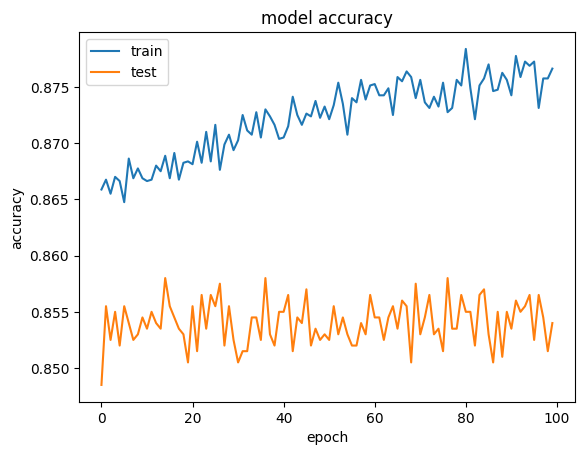

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

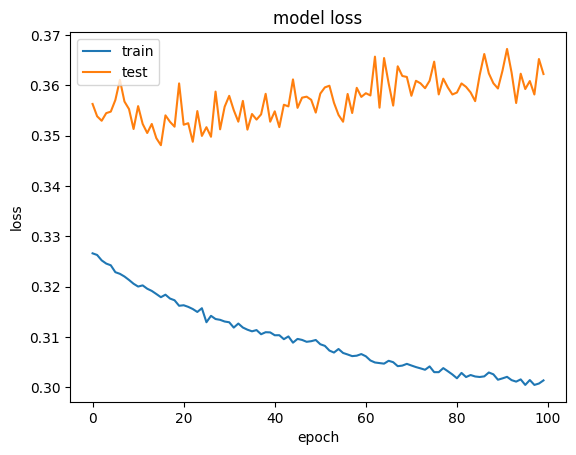

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [ ]:
accuracy=ann.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8540
